# You need to source activate maskrcnn_benchmark

In [1]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)


In [2]:
dataDir='../data/coco'
dataType='train2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [3]:
# initialize COCO api for instance annotations
coco=COCO(annFile)


loading annotations into memory...
Done (t=8.96s)
creating index...
index created!


In [24]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
print(len(cats))
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))


80
COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
kitchen food animal vehicle appliance sports furniture electronic accessory person indoor outdoor


In [4]:
catIds = coco.getCatIds(catNms=['person', 'car', 'bicycle']) 
catIds

[1, 2, 3]

In [7]:

# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person', 'car', 'bicycle'])  #'person', 'car', 
imgIds = coco.getImgIds(catIds=catIds)
print(len(imgIds))
#imgIds = coco.getImgIds(imgIds = [324158])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
img

1101


{'license': 4,
 'file_name': '000000005073.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000005073.jpg',
 'height': 426,
 'width': 640,
 'date_captured': '2013-11-20 01:00:21',
 'flickr_url': 'http://farm8.staticflickr.com/7140/7480886978_cb966c03dc_z.jpg',
 'id': 5073}

In [29]:
all_ids = []
for cat in ['person', 'car', 'bicycle']:
    catIds = coco.getCatIds(catNms=cat)
    imgIds = coco.getImgIds(catIds=catIds)
    print("Number of images in category {} is {}".format(cat, len(imgIds)))
    all_ids += imgIds
unique_ids = list(set(all_ids))
print("len of all ids {} and unique ids {}".format(len(all_ids), len(unique_ids)))

Number of images in category person is 64115
Number of images in category car is 12251
Number of images in category bicycle is 3252
len of all ids 79618 and unique ids 68322


In [32]:
8507
img = coco.loadImgs(8507)[0]

KeyError: 8507

http://images.cocodataset.org/train2017/000000262146.jpg
[454022]
[{'segmentation': [[341.52, 385.94, 331.48, 400.29, 331.48, 423.25, 337.22, 447.64, 322.87, 466.3, 292.74, 474.91, 285.56, 437.6, 269.78, 404.59, 292.74, 387.37, 309.96, 371.59, 288.43, 357.24, 278.39, 385.94, 274.08, 395.98, 256.86, 427.55, 246.82, 433.29, 238.21, 433.29, 233.9, 430.42, 225.29, 406.03, 245.38, 377.33, 255.43, 345.76, 249.69, 322.8, 228.16, 315.62, 220.99, 296.97, 226.73, 284.05, 242.51, 278.31, 256.86, 279.75, 268.34, 275.44, 315.7, 263.96, 320.0, 263.96, 340.09, 281.18, 355.87, 305.58, 364.48, 348.63, 358.74, 377.33]], 'area': 18360.311950000007, 'iscrowd': 0, 'image_id': 262146, 'bbox': [220.99, 263.96, 143.49, 210.95], 'category_id': 1, 'id': 454022}]


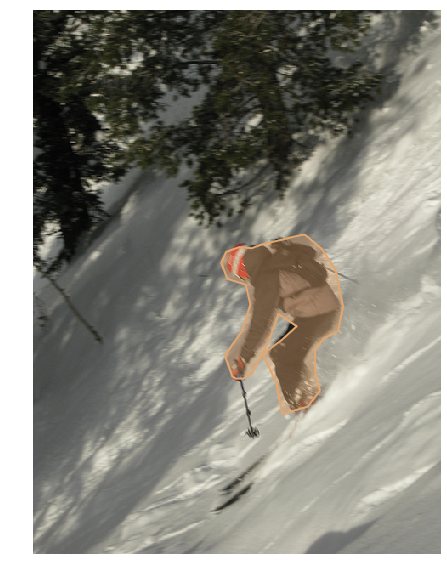

In [31]:
# load and display instance annotations

img = coco.loadImgs(unique_ids[1])[0] #np.random.randint(0,len(unique_ids))
print(img['coco_url'])
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
# plt.show()
# print(img)
# print(img['id'])
annIds = coco.getAnnIds(imgIds=img['id'],catIds=[1,2,3,8], iscrowd=None)
print(annIds)
anns = coco.loadAnns(annIds)
print(anns)
coco.showAnns(anns)


{'license': 4, 'file_name': '000000210175.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000210175.jpg', 'height': 496, 'width': 640, 'date_captured': '2013-11-19 03:13:37', 'flickr_url': 'http://farm9.staticflickr.com/8241/8553344865_42620fd73f_z.jpg', 'id': 210175}


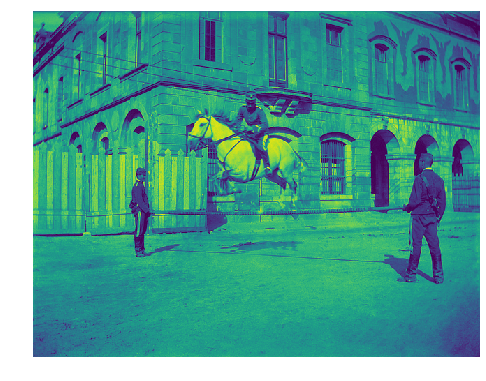

In [28]:
img = coco.loadImgs([210175])[0] 
print(img)
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
# plt.show()
# print(img)
# # print(img['id'])
# annIds = coco.getAnnIds(imgIds=img['id'],catIds=[1,2,3,8], iscrowd=None)
# print(annIds)
# anns = coco.loadAnns(annIds)
# print(anns)
# coco.showAnns(anns)